<a href="https://colab.research.google.com/github/rhys1998/Stock-Price-Prediction/blob/master/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#This program uses an artificial recurrent neural network called LOng Short term memory
#to predict share price

In [0]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

from datetime import date

today = date.today()



In [0]:
#get the stock quote
df= web.DataReader('msft',data_source='yahoo', start='2012-01-01' , end= today)

#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.020796
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.539021
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.769344
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.123066
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.818701
...,...,...,...,...,...,...
2020-02-19,188.179993,186.470001,188.059998,187.279999,29997500.0,187.279999
2020-02-20,187.250000,181.100006,186.949997,184.419998,36862400.0,184.419998
2020-02-21,183.500000,177.250000,183.169998,178.589996,48572600.0,178.589996


In [0]:
#get the  no of rowes and columns
df.shape

(2049, 6)

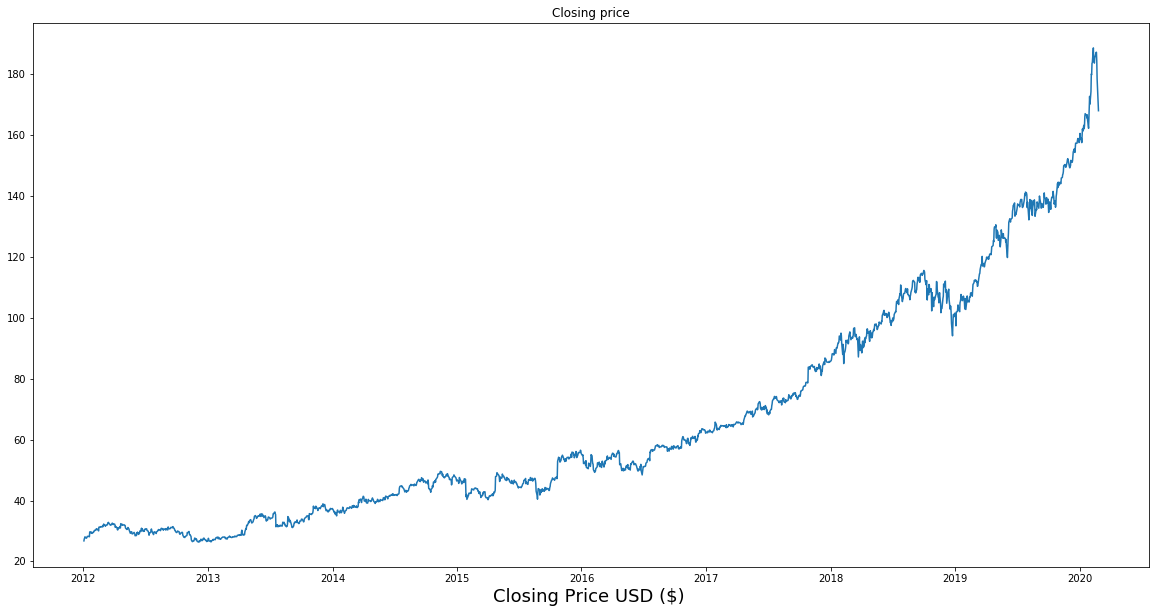

In [0]:
#visualize the closing priice
plt.figure(figsize=(20,10))
plt.title('Closing price')
plt.plot(df['Close'])
plt.xlabel('Closing Price USD ($) ',fontsize=18)
plt.show()

In [0]:
 #create a dataframe with only the 'close coloumn'
 data = df.filter(['Close'])
 #convert the data frame into numpy array
 dataset=data.values
 #get the no of rows to train the model on
 training_data_len = math.ceil( len(dataset) * .8)

 training_data_len

1640

In [0]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.00246411],
       [0.00634509],
       [0.00806998],
       ...,
       [0.93771946],
       [0.89028523],
       [0.87291326]])

In [0]:
#create  the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data set
x_train = []
y_train = []


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
    

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02057536, 0.02069857, 0.01829606,
       0.01965132, 0.01928171, 0.01761842, 0.01995934, 0.01946652,
       0.02168422, 0.02205384, 0.02384032, 0.02359391, 0.02451796,
       0.02642764, 0.02710528, 0.025442  , 0.02593482, 0.02390192,
       0.02266986, 0.03030863, 0.03006221, 0.03123267, 0.03018542,
       0.03080145, 0.03147908, 0.03067825, 0.0338816 , 0.03308076,
       0.03646892, 0.03517527, 0.03345037, 0.0319719 , 0.03369679,
       0.03474403, 0.03462083, 0.03492885, 0.03880982, 0.03942586,
       0.03991867, 0.0383786 , 0.0359145 , 0.03462083, 0.03412801,
       0.03468243, 0.03474403, 0.03831701, 0.03788579, 0.03585288])]
[0.03542166100213601]

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02

In [0]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)


In [0]:
#Reshape the data
x_train=np.reshape(x_train ,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1580, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
#compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train,y_train, batch_size=1 , epochs=1)

Epoch 1/1
1580/1580 [==============================] - 114s 72ms/step - loss: 4.5206e-04


In [0]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#convert the data to a numpy array
x_test= np.array(x_test)

In [0]:
#Reshape the datA
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions =  scaler.inverse_transform(predictions)

In [0]:
#Get the root mean suared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

7.764213897779693

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


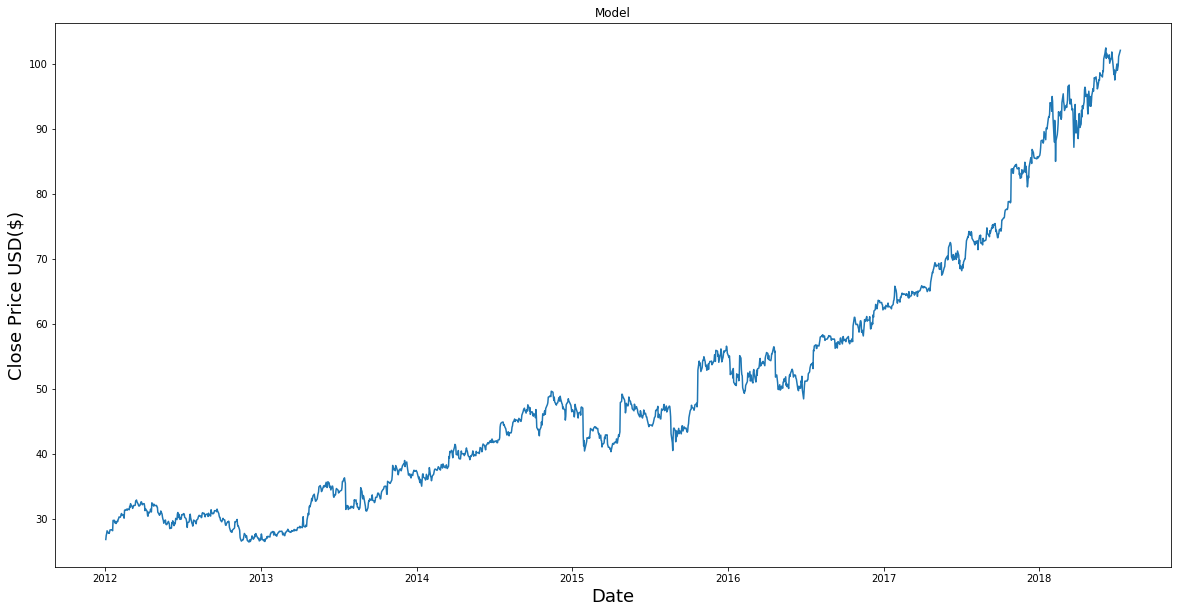

In [0]:
#plot the data
train = data[: training_data_len]
valid= data[training_data_len :]
valid['Prediction'] = predictions
#visualize the model
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])

plt.show()

In [0]:
#show the valid and actual prices

valid

,Close,Prediction
Date,,
2018-07-11,101.980003,96.437332
2018-07-12,104.190002,96.736984
2018-07-13,105.430000,97.167686
2018-07-16,104.910004,97.723625
2018-07-17,105.949997,98.277176
...,...,...
2020-02-19,187.279999,166.700302
2020-02-20,184.419998,167.334976
2020-02-21,178.589996,167.713745


In [0]:
#get the quote
microsoft_quote = web.DataReader('msft',data_source='yahoo',start='2012-01-01',end='today')

print(microsoft_quote)

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2012-01-03   26.959999   26.389999  ...  64731500.0   22.020796
2012-01-04   27.469999   26.780001  ...  80516100.0   22.539021
2012-01-05   27.730000   27.290001  ...  56081400.0   22.769344
2012-01-06   28.190001   27.530001  ...  99455500.0   23.123066
2012-01-09   28.100000   27.719999  ...  59706800.0   22.818701
...                ...         ...  ...         ...         ...
2020-02-19  188.179993  186.470001  ...  29997500.0  187.279999
2020-02-20  187.250000  181.100006  ...  36862400.0  184.419998
2020-02-21  183.500000  177.250000  ...  48572600.0  178.589996
2020-02-24  174.550003  163.229996  ...  68311100.0  170.889999
2020-02-25  174.839996  167.649994  ...  67936100.0  168.070007

[2049 rows x 6 columns]


In [0]:

#create new dataframe
new_df = microsoft_quote.filter(['Close'])

#Get the last 60 days closing price values and convert the data frame into arrays
last_60_days = new_df[-60: ].values
#print(last_60_days)

last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)

#convert the X_test data into numpy array
X_test=np.array(X_test)
#print(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo scalling
pred_price = scaler.inverse_transform(pred_price)
print (pred_price)





[[167.71376]]


In [0]:
#get the quote
microsoft_quote2 = web.DataReader('msft',data_source='yahoo',start= today ,end= today )
print(microsoft_quote2['Close'])

Date
2020-02-25    168.070007
Name: Close, dtype: float64
